In [1]:
import pathlib

Dataset_Path = "C:/Users/USER/Desktop/Projects/Github_Repo/AI/DeepLearning/__HW1_DATA/images/"
data_dir = pathlib.Path(Dataset_Path)

In [2]:
image_count = len(list(data_dir.glob("*/*.jpeg")))
print(image_count)

64225


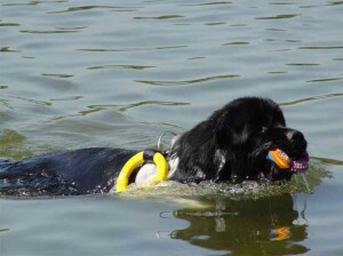

In [3]:
import PIL.Image

black_dogs = list(data_dir.glob("n02111277/*"))
PIL.Image.open(str(black_dogs[0]))

# Load useing Keras Preprocessing

In [4]:
import tensorflow as tf

In [73]:
batch_size = 50
img_height = 30
img_width  = 30

In [74]:
import numpy as np
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.01)
#mean = np.array([123.68, 116.779, 103.939], dtype="float32")
#img_gen.mean = mean

train_generator = img_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = img_gen.flow_from_directory(
    data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

# Wrap the generator with tf.data
#ds = tf.data.Dataset.from_generator(
#    lambda: img_gen.flow_from_directory(data_dir,
#            class_mode="categorical",
#            target_size=(30, 30),
#            color_mode="rgb",
#            batch_size = 50,
#            shuffle=True),
#    output_types=(tf.float32, tf.float32),
#    output_shapes = ([None,30,30,3],[None,50])
#)

#ds

Found 63584 images belonging to 50 classes.
Found 641 images belonging to 50 classes.


# Visualize the data

Found 64225 images belonging to 50 classes.


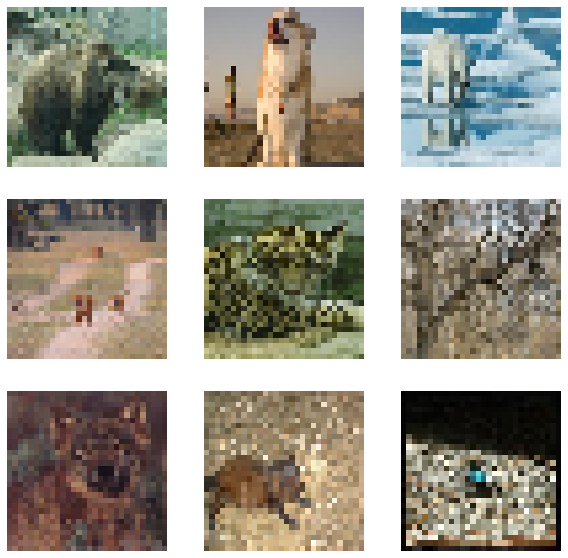

In [75]:
import matplotlib.pyplot as plt
import numpy

plt.figure(figsize=(10, 10))

for images, labels in ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        #plt.title(class_names[labels[i]])
        plt.axis("off")

In [76]:
for image_batch, labels_batch in ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break
    
labels_batch

Found 64225 images belonging to 50 classes.
(50, 30, 30, 3)
(50, 50)


<tf.Tensor: shape=(50, 50), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [62]:
from imutils import paths
total_data = len(list(paths.list_images(data_dir)))
total_data

64225

In [67]:
from tensorflow.keras.optimizers import RMSprop

# Lenet5 Version

num_classes = 50

model = tf.keras.Sequential([
    layers.Conv2D(6, 3, input_shape=(30, 30, 3) ,activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(120, 6, activation="relu"),
    layers.Flatten(),
    layers.Dense(84, activation="relu"),
    layers.Dense(num_classes, activation="softmax"),
])

print(model.summary())

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])


Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 28, 28, 6)         168       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 12, 12, 16)        880       
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 1, 1, 120)         69240     
_________________________________________________________________
flatten_19 (Flatten)         (None, 120)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 84)              

In [ ]:
#model.fit(ds, steps_per_epoch=total_data//50, epochs=10)

model.fit_generator(train_generator, steps_per_epoch=63584//50, epochs=10, verbose=1, callbacks=None, validation_data=validation_generator, validation_steps=641//50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1271 steps, validate for 12 steps
Epoch 1/10
1271/1271 [==============================] - 1069s 841ms/step - loss: 3.2853 - acc: 0.1326 - val_loss: 3.0957 - val_acc: 0.1783
Epoch 2/10
1271/1271 [==============================] - 185s 145ms/step - loss: 3.0533 - acc: 0.1815 - val_loss: 3.0698 - val_acc: 0.1717
Epoch 3/10
1271/1271 [==============================] - 138s 108ms/step - loss: 2.9598 - acc: 0.2008 - val_loss: 2.9436 - val_acc: 0.2233
Epoch 4/10
 419/1271 [========>.....................] - ETA: 1:28 - loss: 2.8925 - acc: 0.2189

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy(history, miny=None):
    acc = history.history['acc']
    #test_acc = history.history['val_acc']
    epochs = range(len(acc))
    plt.plot(epochs, acc, c = "b", label='train_acc')
    #plt.plot(epochs, test_acc, c = "r" ,label='val_acc')
    plt.legend(loc="upper left")

    plt.title('accuracy') 
    plt.figure()
    plt.show()
    
plot_accuracy(history)
